<a href="https://colab.research.google.com/github/areenqandeel/Artificial-intelligence-project-to-predict-students-academic-performance/blob/main/V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **AIM B - Data cleaning** (B.P4 + B.M2)

Call Libraries

In [1]:
import pandas as pd #للتعامل مع البيانات على شكل جدول Data Frame
import numpy as np #للتعامل مع القيم العددية
from sklearn.preprocessing import LabelEncoder #لتحويل النص الى أرقام ليستطيع النموذج فهمها
from sklearn.model_selection import train_test_split #دالة تقسيم البيانات الى تدريب/اختبار/تحقق

Connect To The Drive

In [2]:
from google.colab import drive
from google.colab import files
drive.mount("/content/drive")

Mounted at /content/drive


Load a CSV file from google drive

In [3]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/students/StudentPerformanceFactors.csv')#قراءة ااملف
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


Data exploration/استكشاف البيانات

In [4]:
df.info() #يعرض عدد القيم والانواع والقيم الفارغة

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [5]:
print (df.shape[0]) #يعرض عدد الصفوف
print (df.shape[1]) # وعدد الأعمدة

6607
20


In [6]:
df.describe() #يعرض المتوسط الحسابي والانحراف المعياري وأقل وأعلى قيمة

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


In [7]:
df.columns #يعرض قائمة بأسماء الأعمدة

Index(['Hours_Studied', 'Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours',
       'Previous_Scores', 'Motivation_Level', 'Internet_Access',
       'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type',
       'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities',
       'Parental_Education_Level', 'Distance_from_Home', 'Gender',
       'Exam_Score'],
      dtype='object')

In [8]:
df.dtypes #يعرض نوع البيانات في كل عمود

,0
Hours_Studied,int64
Attendance,int64
Parental_Involvement,object
Access_to_Resources,object
Extracurricular_Activities,object
Sleep_Hours,int64
Previous_Scores,int64
Motivation_Level,object
Internet_Access,object
Tutoring_Sessions,int64


In [9]:
df.head() #يعرض أول  خمسة سطور من مجموعة البيانات

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [10]:
df.tail() #يعرض آخر  خمسة سطور  من مجموعة البيانات

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68
6606,15,67,Medium,Low,Yes,9,94,Medium,Yes,0,Medium,Medium,Public,Positive,4,No,Postgraduate,Near,Male,64


In [11]:
df.nunique() #كم عدد القيم المختلفة  في كل عمود

,0
Hours_Studied,41
Attendance,41
Parental_Involvement,3
Access_to_Resources,3
Extracurricular_Activities,2
Sleep_Hours,7
Previous_Scores,51
Motivation_Level,3
Internet_Access,2
Tutoring_Sessions,9


Check how many duplicate rows in Dataset & calculate total number of duplicate rows

In [12]:
#التحقق إذا كانت هناك اي صفوف مكررة في مجموعة البيانات
has_duplicates = df.duplicated().any()
#طباعة النتيجة إذا هل يوجد صفوف مكررة ام لا
print ('are there any duplicated rows in the Dataset?' , df.duplicated().any())
#حساب العدد الكامل للصفوف المكررة في مجموعة البيانات
no_of_duplicate = df.duplicated().sum()
#طباعة عدد الصفوف المكررة
print ('number of duplicate row:' , no_of_duplicate)

are there any duplicated rows in the Dataset? False
number of duplicate row: 0


 استكشاف القيم الغير معقولة بهذه (الطريقة الأولية لانه في التحسين يوجد طريقة تانية لاستشكاف القيم الغير معقولة) Outliers

In [13]:
# إذا في درجات غير منطقية نحولها NaN وبعدين بعوضه
df.loc[(df["Exam_Score"] < 0) | (df["Exam_Score"] > 100), "Exam_Score"] = np.nan

Check for null values

In [14]:
#طباعة رسالة توضيحية لعرض عدد القيم الفارغة ف كل عمود
print("Number of missing values in each column:")
#حساب عدد القيم الفارغة في كل عمود من أعمدة مجموعة البيانات
df.isnull().sum()

Number of missing values in each column:


,0
Hours_Studied,0
Attendance,0
Parental_Involvement,0
Access_to_Resources,0
Extracurricular_Activities,0
Sleep_Hours,0
Previous_Scores,0
Motivation_Level,0
Internet_Access,0
Tutoring_Sessions,0


Handling missing values ​​using the MODE method

In [15]:
#المرور على جميع الاعمدة في مجموعة البيانات
for column in df.columns:
    #التحقق إذا ككان العمود يحتوي على قيم مفقودة
    if df[column].isnull().sum() > 0:
       #تعويض القيم المفقودة بالمنوال (أكثر قيمة متكررة في العمود)
        df[column].fillna(df[column].mode()[0], inplace=True)

/tmp/ipython-input-1926634464.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mode()[0], inplace=True)


Check if any values ​​remain missing


In [16]:
print("Number of missing values in each column:")
#عرض عدد القيم المفوقدة في كل عمود للتحقق إذا ما زال يوجد قيم مفقودة
df.isnull().sum()

Number of missing values in each column:


,0
Hours_Studied,0
Attendance,0
Parental_Involvement,0
Access_to_Resources,0
Extracurricular_Activities,0
Sleep_Hours,0
Previous_Scores,0
Motivation_Level,0
Internet_Access,0
Tutoring_Sessions,0


Converting category columns to numerical

In [17]:
#تحسين
#أداة لتحويل القيم النصيةالى ارقام
le = LabelEncoder()
#المرور على جميع الاعمدة التي نوعها نصي
for column in df.select_dtypes(include='object').columns:
   #تحويل القيم النصية داخل العمودالى قيم رقمية
    df[column] = le.fit_transform(df[column])

Data type verification after encoding

In [18]:
#قمت بعمل هذه الخطوة للتأكد من ان جميع الاعمدة تحولت الى نوع رقمي
print ("Data types after encoding:")
df.dtypes #يعرض نوع البيانات في كل عمود

Data types after encoding:


,0
Hours_Studied,int64
Attendance,int64
Parental_Involvement,int64
Access_to_Resources,int64
Extracurricular_Activities,int64
Sleep_Hours,int64
Previous_Scores,int64
Motivation_Level,int64
Internet_Access,int64
Tutoring_Sessions,int64


**Exploring bias**


اكتشاف التحيز لعمود Gender

In [19]:
#حساب نسبة كل فئة من اجمالي البيانات
print(df["Gender"].value_counts(normalize=True) * 100) #يحولها الى نسبة مؤية

Gender
1    57.726654
0    42.273346
Name: proportion, dtype: float64


In [20]:
#حساب متوسط (نتيجة الامتحان) لكل قيمة في العمود
print(df.groupby("Gender") #قسم البيانات حسب الجنس
["Exam_Score"]#اختبار العلامة
      .mean()) #احسب المتوسط لكل فئة

Gender
0    67.233083
1    67.228894
Name: Exam_Score, dtype: float64


اكتشاف التحيز لعمود Family_Income

In [21]:
#حساب نسبة كل فئة دخل
print(df["Family_Income"].value_counts(normalize=True) * 100)#يحولها الى نسبة مؤية

Family_Income
1    40.441956
2    40.351143
0    19.206902
Name: proportion, dtype: float64


In [22]:
#حساب متوسط (نتيجة الامتحان) لكل مستوى دخل
print(df.groupby("Family_Income")
["Exam_Score"]#اختبار العلامة
      .mean())#احسب المتوسط لكل فئة

Family_Income
0    67.816391
1    66.848428
2    67.334959
Name: Exam_Score, dtype: float64


اكتشاف التحيز لعمود School_Type

In [23]:
#حساب نسبة كل نوع مدرسة
print(df["School_Type"].value_counts(normalize=True) * 100)#يحولها الى نسبة مؤية

School_Type
1    69.592856
0    30.407144
Name: proportion, dtype: float64


In [24]:
#حساب متوسط (نتيجة الامتحان) لكل نوع مدرسة
print(df.groupby("School_Type")
["Exam_Score"]#اختبار العلامة
      .mean())#احسب المتوسط لكل فئة

School_Type
0    67.287705
1    67.205742
Name: Exam_Score, dtype: float64


Dividing the data into training, verification, and testing groups

In [25]:
#إنشاؤ متغير يحتوي على جميع الأعمدة ما عدا عمود الدرجة النهائية
#هذه هي المدخلات التي سيستخدمها النموذج للتنبؤ
#علما ان هذا التقسيم للتنبؤ برقم وسأقوم بعمل تقسيم اخر خاص بالتصنيف
X = df.drop("Exam_Score", axis=1) #axis يعني حذف عمود وليس صف
#إنشاء متغير يحتوي فقط على الدرجة النهائية
#هذا هو متغير الهدف الذي اريد للنموذج التنبؤ به
y = df["Exam_Score"]

In [26]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)

Checking the final result after cleaning


In [27]:
print ("Display the first five rows of the data set to verify the final result after cleaning.")
df.head() #يعرض أول  خمسة سطور من مجموعة البيانات

Display the first five rows of the data set to verify the final result after cleaning.


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,1,0,0,7,73,1,1,0,1,2,1,2,3,0,1,2,1,67.0
1,19,64,1,2,0,8,59,1,1,2,2,2,1,0,4,0,0,1,0,61.0
2,24,98,2,2,1,7,91,2,1,2,2,2,1,1,4,0,2,2,1,74.0
3,29,89,1,2,1,8,98,2,1,1,2,2,1,0,4,0,1,1,1,71.0
4,19,92,2,2,1,6,65,2,1,3,2,0,1,1,4,0,0,2,0,70.0


In [28]:
#حفظ مجموعة البيانات بعد التنظيف في ملف جديد
df.to_csv('StudentPerformance_Cleaned.csv', index=False) #لا تحفظ أرقام الصفوف
df_basic = df.copy()

### **B.M2 Reviewing datasets to improve the quality of AI solutions**

In [29]:
import pandas as pd #للتعامل مع البيانات على شكل جدول Data Frame
import numpy as np #للتعامل مع القيم العددية
from sklearn.preprocessing import LabelEncoder #لتحويل النص الى أرقام ليستطيع النموذج فهمها
# تحميل الداتا (قبل أي تنظيف)
df = pd.read_csv("/content/drive/MyDrive/students/StudentPerformanceFactors.csv")
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


Discovering illogical values/outliers

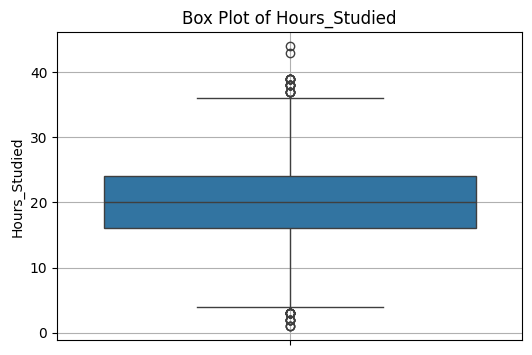

In [30]:
#تحسين
import matplotlib.pyplot as plt
import seaborn as sns

# اختيار الأعمدة الرقمية فقط
numeric_columns = ["Hours_Studied"]

# رسم Box Plot للعمود
for col in numeric_columns:
    plt.figure(figsize=(6,4)) #إنشاء مساحة رسم بحجم معين
    sns.boxplot(y=df[col])
    plt.title(f"Box Plot of {col}") #وضع عنوان للرسم وحرف ال f معناها نقدر نكتب اسم العمود داخل النص
    plt.ylabel(col)
    plt.grid(True) #تفعيل الشبكة لتسهيل القراءة
    plt.show() #عرض الرسم النهائي

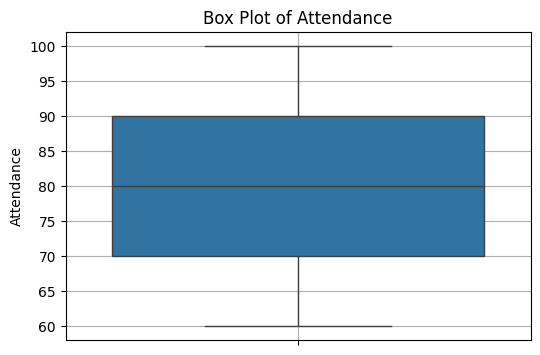

In [31]:
#تحسين
import matplotlib.pyplot as plt
import seaborn as sns

# اختيار الأعمدة الرقمية فقط
numeric_columns = ["Attendance"]

# رسم Box Plot للعمود
for col in numeric_columns:
    plt.figure(figsize=(6,4)) #إنشاء مساحة رسم بحجم معين
    sns.boxplot(y=df[col])
    plt.title(f"Box Plot of {col}") #وضع عنوان للرسم وحرف ال f معناها نقدر نكتب اسم العمود داخل النص
    plt.ylabel(col)
    plt.grid(True) #تفعيل الشبكة لتسهيل القراءة
    plt.show() #عرض الرسم النهائي

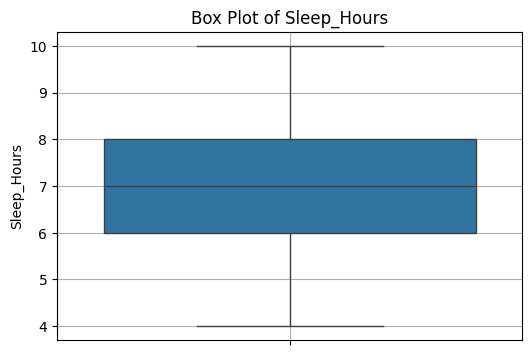

In [32]:
#تحسين
import matplotlib.pyplot as plt
import seaborn as sns

# اختيار الأعمدة الرقمية فقط
numeric_columns = ["Sleep_Hours"]

# رسم Box Plot للعمود
for col in numeric_columns:
    plt.figure(figsize=(6,4)) #إنشاء مساحة رسم بحجم معين
    sns.boxplot(y=df[col])
    plt.title(f"Box Plot of {col}") #وضع عنوان للرسم وحرف ال f معناها نقدر نكتب اسم العمود داخل النص
    plt.ylabel(col)
    plt.grid(True) #تفعيل الشبكة لتسهيل القراءة
    plt.show() #عرض الرسم النهائي

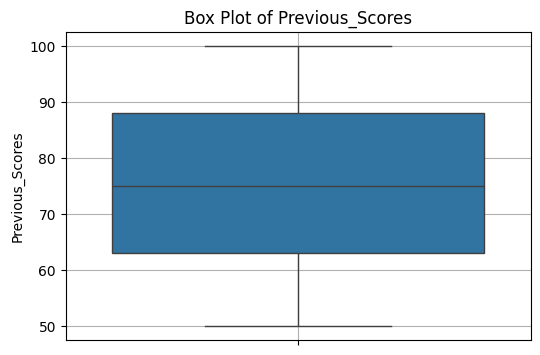

In [33]:
#تحسين
import matplotlib.pyplot as plt
import seaborn as sns

# اختيار الأعمدة الرقمية فقط
numeric_columns = ["Previous_Scores"]

# رسم Box Plot للعمود
for col in numeric_columns:
    plt.figure(figsize=(6,4)) #إنشاء مساحة رسم بحجم معين
    sns.boxplot(y=df[col])
    plt.title(f"Box Plot of {col}") #وضع عنوان للرسم وحرف ال f معناها نقدر نكتب اسم العمود داخل النص
    plt.ylabel(col)
    plt.grid(True) #تفعيل الشبكة لتسهيل القراءة
    plt.show() #عرض الرسم النهائي

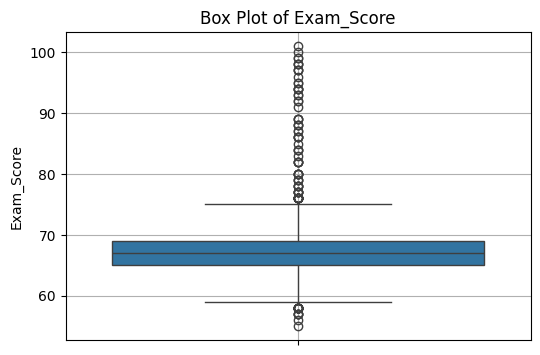

In [34]:
#تحسين
import matplotlib.pyplot as plt
import seaborn as sns

# اختيار الأعمدة الرقمية فقط
numeric_columns = ["Exam_Score"]

# رسم Box Plot للعمود
for col in numeric_columns:
    plt.figure(figsize=(6,4)) #إنشاء مساحة رسم بحجم معين
    sns.boxplot(y=df[col])
    plt.title(f"Box Plot of {col}") #وضع عنوان للرسم وحرف ال f معناها نقدر نكتب اسم العمود داخل النص
    plt.ylabel(col)
    plt.grid(True) #تفعيل الشبكة لتسهيل القراءة
    plt.show() #عرض الرسم النهائي

Solving outliers


In [35]:
#تحسين
#دالة لمعالجة القيم الشاذة باستخدام طريقة IQR
#استبدال القيم الشاذة بالوسيط
def handle_outliers(df, column):

    #حساب الربع الأول
    Q1 = df[column].quantile(0.25)
    #حساب الربع الثالث
    Q3 = df[column].quantile(0.75)
    #حساب المدى الربيعي (IQR)
    #الفرق بين Q1 و Q3
    IQR = Q3 - Q1

    #تحديد الحد الأدنى للقيم الطبيعية
    lower_bound = Q1 - 1.5 * IQR
    #تحديد الحد الأاعلى للقيم الطبيعية
    upper_bound = Q3 + 1.5 * IQR

    #حساب الوسيط للعمود
    median_value = df[column].median()

    # استبدال القيم الأقل من الحد الأدنى
    # أو الأكبر من الحد الأعلى
    # بالقيمة الوسيطة
    df.loc[(df[column] < lower_bound) |
           (df[column] > upper_bound), column] = median_value

    return df #إرجاع البيانات بعد التعديل

In [36]:
#تحسين
#معالجة القيم الشاذة في عمود عدد ساعات الدراسة فقط
df = handle_outliers(df, "Hours_Studied")

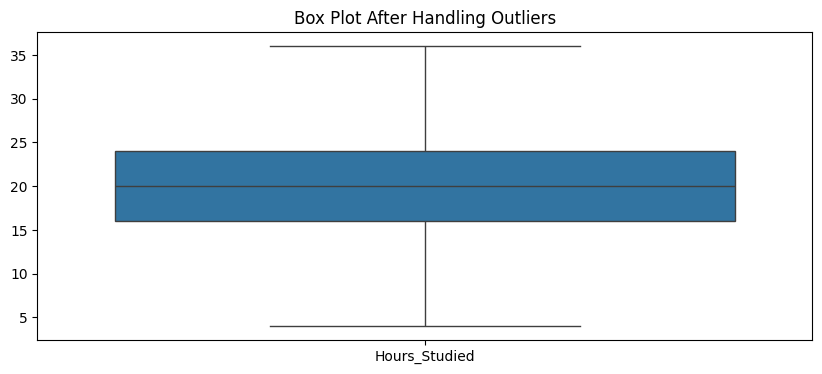

In [37]:
#تحسين
#استدعاء المكتبة للرسم الاحصائصي
import seaborn as sns
#استدعاء المكتبة لرسم المخططات البيانية
import matplotlib.pyplot as plt

#انشاء شكل الرسم
#إعادة رسم Box Plot يعد المعالجة
plt.figure(figsize=(10,4))
#رسم Box Plot لعمود عدد ساعات الدراسة بعد إزالة القيم الشاذة
sns.boxplot(data=df[["Hours_Studied"]])
#إضافة عنوان للرسم
plt.title("Box Plot After Handling Outliers")
#عرض الرسم
plt.show()

عرض عدد القيم المفقودة في كل عمود للتحقق إذا كانت هناك قيم ممفقودة


In [38]:
print("Number of missing values in each column:")
df.isnull().sum()

Number of missing values in each column:


,0
Hours_Studied,0
Attendance,0
Parental_Involvement,0
Access_to_Resources,0
Extracurricular_Activities,0
Sleep_Hours,0
Previous_Scores,0
Motivation_Level,0
Internet_Access,0
Tutoring_Sessions,0


بدل طريقة المود (الأكثر تكرارا) قمت بحذف الصف كامل مع انه ممكن ان يقلل من حجم البيانات لكنها تمنع إدخال قيم تسبب تحيز

In [39]:
#تحسين
# حذف أي صف فيه قيم ناقصة (بدل التعويض)
df = df.dropna()
print("After dropping missing rows:", df.shape)

After dropping missing rows: (6378, 20)


عرض عدد القيم المفقودة للتأكد إذا ما زال يوجد قيم مفقودة او لا

In [40]:
df.isnull().sum()

,0
Hours_Studied,0
Attendance,0
Parental_Involvement,0
Access_to_Resources,0
Extracurricular_Activities,0
Sleep_Hours,0
Previous_Scores,0
Motivation_Level,0
Internet_Access,0
Tutoring_Sessions,0


Standardization of texts


In [41]:
#تحسين
for col in df.select_dtypes(include="object").columns:
    df[col] = df[col].str.strip() # إزالة الفراغات
    df[col] = df[col].str.lower() # توحيد الحروف

في هذه الخطوة سأقوم بتحويل عمود الدرجة النهائية الى فئات (راسب/ناجح/ممتاز) لأنشاء متغير هدف مناسب لنماذج التصنيف
(إنشاء عمود التصنيف لاستخدامه لاحقا في خوازرميات التصنيف)

In [42]:
import numpy as np
# إنشاء عمود التصنيف بناءً على Final_Score
# Fail: < 50
# Pass: 50 to < 85
# Excellent: >= 85
df["stu_group"] = np.where(df["Exam_Score"] < 50, "Fail",
                    np.where(df["Exam_Score"] >= 85, "Excellent", "Pass"))
# عرض عدد الطلاب في كل فئة للتأكد
print(df["stu_group"].value_counts())

stu_group
Pass         6343
Excellent      35
Name: count, dtype: int64


التحويل من نص لرقم

In [43]:
#تحسين
#أداة لتحويل القيم النصيةالى ارقام
le = LabelEncoder()
#المرور على جميع الاعمدة التي نوعها نصي
for column in df.select_dtypes(include='object').columns:
   #تحويل القيم النصية داخل العمودالى قيم رقمية
    df[column] = le.fit_transform(df[column])

حفظ وتنزيل مجموعة البيانات بعد تحسين كود التنضيف

In [44]:
# حفظ مجموعة البيانات بعد التحسين والتنظيف
df.to_csv('StudentPerformance_Cleaned_Improved.csv', index=False)
df_improved = df.copy()

استخدام نموذج الانحدار العشوائي للغابات لمقارنة الدقة بين كود التنضيف قبل التحسين وكود التنضيف بعد التحسين

In [45]:
#استدعاء دالة تقسيم البيانات الى تدريب واختبار
from sklearn.model_selection import train_test_split
#استدعاء خوارزمية الغابة العشوائية للانحدار (للتنبؤ بدرجات الطلاب)
from sklearn.ensemble import RandomForestRegressor
#استدعاء مقياس R2 لتقييم جودة التنبؤ بدرجات الطلاب
from sklearn.metrics import r2_score
#إنشاء دالة لتقييم النموذج على اي مجموعة بيانات يتم إعطاءه اياه
def evaluate_model(df):

#قمت بإعطاءه كل الأعمدة ما عدا الدرجة النهائية لان الدرجة النهائية هو الذي سيتنبأها
    X = df.drop("Exam_Score", axis=1)
#العمال الذي سيعتمد عليه النموذج في التنبؤ به وهو درجة الطلاب
    y = df["Exam_Score"]

    # تقسيم البيانات: 80% تدريب و 20% اختبار
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.20, random_state=42
    )


    # إنشاء نموذج الغابة العشوائية
    model = RandomForestRegressor(random_state=42)

    # تدريب النموذج على بيانات التدريب (70%)
    model.fit(X_train, y_train)

    # التنبؤ على بيانات الاختبار النهائية (15%)
    y_pred = model.predict(X_test)

    # حساب R2
    return r2_score(y_test, y_pred)

حساب الدقة قبل تحسين كود التنضيفف وبعد تحسين كود التنضيف

In [46]:
# حساب دقة النموذج باستخدام كود التنظيف الأساسي
r2_basic = evaluate_model(df_basic)
# حساب دقة النموذج باستخدام كود التنظيف المحسن
r2_improved = evaluate_model(df_improved)
# طباعة النتائج للمقارنة

print("R2 Basic Cleaning:", r2_basic)
print("R2 Improved Cleaning:", r2_improved)

R2 Basic Cleaning: 0.654881000297932
R2 Improved Cleaning: 0.859086487739734


===================================================
===================================================

### **AIM C - Making artificial intelligence models (C.P5 + C.M3)**



### **Phase 1: Prediction**

المرحلة الاولى: التنبؤ بالدرجة - التعلم تحت الاشراف (Regression)
الهدف من هذه المرحلة هو تدريب نماذج تحت الاشراف للتنبؤ بقيمة درجة الطالب من خلال الاعتماد على العوامل المؤثرة مثل عدد ساعات الدراسة والحضور والتحفيز الخ

Decesion Tree Regressor

In [47]:
# استدعاء نموذج شجرة القرار للانحدار
from sklearn.tree import DecisionTreeRegressor
#استيراد مقاييس الدقة: متوسط الخطأ التربيعي ومعامل التحديد
from sklearn.metrics import mean_squared_error, r2_score

# إنشاء النموذج
#ووضعت رقم 42 لتثبيت النتائج وعدم تغييرها في كل مرة
decesion_tree_model = DecisionTreeRegressor(random_state=42)

# تدريب النموذج على بيانات التدريب
decesion_tree_model.fit(X_train, y_train)

# استخدام النموذج المدرب للتنبؤ بدرجات الطلاب في مجموعة الاختبار (20%)
y_test_pred_decision_tree = decesion_tree_model.predict(X_test)

# حساب متوسط الخطأ التربيعي (كلما كانت القيمة أصغر كان الأداء أفضل)
mse_decision_tree = mean_squared_error(y_test, y_test_pred_decision_tree)

# حساب معامل التحديد R2
r2_decision_tree = r2_score(y_test, y_test_pred_decision_tree)

 #طباعة النتيجة النهائية للنموذج
print("Decision Tree Regressor Results:")
print("MSE:", mse_decision_tree)#قديش الخطأ كبير
print("R2:", r2_decision_tree) #قديش النموذج فهم البيانات

Decision Tree Regressor Results:
MSE: 9.396369137670197
R2: 0.3352443607500757


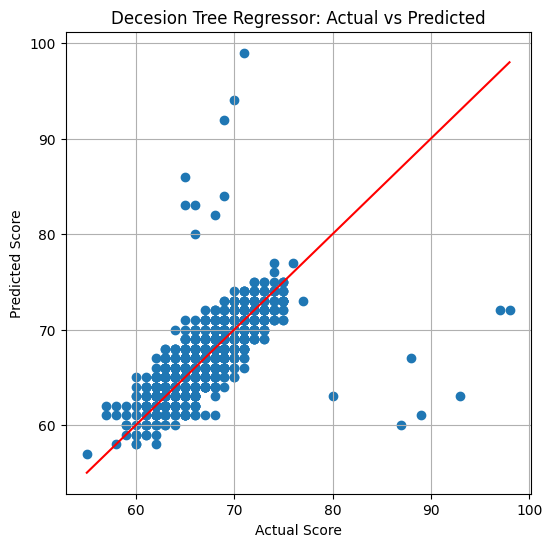

In [48]:
#استدعاء مكتبة الرسم
import matplotlib.pyplot as plt

#انشاء حجم الرسمة
plt.figure(figsize=(6,6))
#رسم القيم الحقيقية مقابل القيم المتوقعة
#كل نقطة تمثل طالب واحد
plt.scatter(y_test, y_test_pred_decision_tree)

# رسم الخط الأحمر
#هذا الخط يمثل الحالة عندما يكون التنبؤ مطابق للقيمة الحقيقية
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color="red")
#تسمية المحور السيني
plt.xlabel("Actual Score")#الدرجة الحقيقية
#تسمية المحور الصادي
plt.ylabel("Predicted Score")#الدرجة المتوقعة من النموذج
plt.title("Decesion Tree Regressor: Actual vs Predicted") #عنوان الرسمة
plt.grid(True) #إظهار الشبكة لتسهيل قراءة القيم
plt.show()#عرض الرسم على شاشة المخرجات

الاستنتاج لرسم نموذج الانحدار لشجرة القرار: يظهر الرسم ان النموذج يحتوي على تشتت أكبر في النقاط حيث توجد نقاط بعيدة بشكل واضح عن الخط الأحمر وهذا يدل على ان النموذج لم يتمكن من التعميم على بيانات التحقق فلذلك يعتبر أداؤه ضعيف

Random Forest Regressor

In [49]:
#استدعاء نموذج الانحدار للغابات العشوائية
from sklearn.ensemble import RandomForestRegressor
#استيراد مقاييس الدقة: متوسط الخطأ التربيعي ومعامل التحديد
from sklearn.metrics import mean_squared_error, r2_score

# إنشاء النموذج
#هذا النموذج يعتمد على عدة أشجار قرار لتحسين دقة التنبؤ
random_forest_model = RandomForestRegressor()

# تدريب النموذج على بيانات التدريب
random_forest_model.fit(X_train, y_train)

# استخدام النموذج المدرب للتنبؤ بدرجات الطلاب في مجموعة الاختبار (20%)
y_test_pred_random_forest = random_forest_model.predict(X_test)

# حساب متوسط الخطأ التربيعي
mse_random_forest = mean_squared_error(y_test, y_test_pred_random_forest)

# حساب معامل التحديد R2
r2_random_forest = r2_score(y_test, y_test_pred_random_forest)

 #طباعة النتيجة النهائية للنموذج
print("Random Forest Results:")
print("MSE:", mse_random_forest)#قديش الخطأ كبير
print("R2:", r2_random_forest)#قديش النموذج فهم البيانات

Random Forest Results:
MSE: 4.852244175491679
R2: 0.6567230776679065


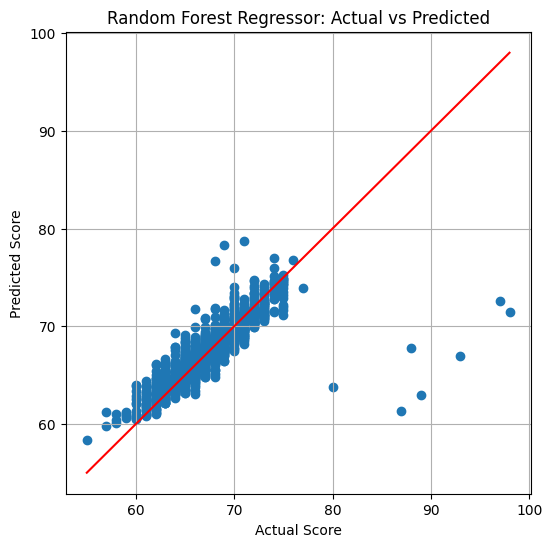

In [50]:
#استدعاء مكتبة الرسم
import matplotlib.pyplot as plt

#انشاء حجم الرسمة
plt.figure(figsize=(6,6))
#رسم القيم الحقيقية مقابل القيم المتوقعة
#كل نقطة تمثل طالب واحد
plt.scatter(y_test, y_test_pred_random_forest)


# رسم الخط الأحمر
#هذا الخط يمثل الحالة عندما يكون التنبؤ مطابق للقيمة الحقيقية
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color="red")

#تسمية المحور السيني
plt.xlabel("Actual Score")#الدرجة الحقيقية
#تسمية المحور الصادي
plt.ylabel("Predicted Score")#الدرجة المتوقعة من النموذج
plt.title("Random Forest Regressor: Actual vs Predicted") #عنوان الرسمة
plt.grid(True) #إظهار الشبكة لتسهيل قراءة القيم
plt.show()#عرض الرسم على شاشة المخرجات

الاستنتاج لرسم نموذج الانحدار للغابات العشوائية: يظهر النموذج تقارب جيد نوعا ما بين القيم الحقيقية والقيم المتوقعة حيث ان معظم النقاط قريبة من الخط الأحمر ويوجد عدد قليل من النقاط بعيدة عن الخط

Linear Regression

في هذه المرحلة سأقوم باستخدام نموذج الانحدار الخطي للتنبؤ بدرجة الطالب وسأقوم بتقييم أداء النموذج باستخدام مقياس متوسط الخطا التربيعي ومعامل التحديد لمعرفة مدى دقة النموذج

In [51]:
#استدعاء نموذج الانحدار الخطي
from sklearn.linear_model import LinearRegression
#استيراد مقاييس الدقة: متوسط الخطأ التربيعي ومعامل التحديد
from sklearn.metrics import mean_squared_error, r2_score

# إنشاء النموذج حيث سيستخدم لتعلم العلاقة بين المتغيرات والدرجة النهائية
linear_model = LinearRegression()

# تدريب النموذج على بيانات التدريب
linear_model.fit(X_train, y_train)

# استخدام النموذج المدرب للتنبؤ بدرجات الطلاب في مجموعة الاختبار (20%)
y_test_pred_linear = linear_model.predict(X_test)

# حساب متوسط الخطأ التربيعي
mse_linear = mean_squared_error(y_test, y_test_pred_linear)

# حساب معامل التحديد R2
r2_linear = r2_score(y_test, y_test_pred_linear)

 #طباعة النتيجة النهائية للنموذج
print("Linear Regression Results:")
print("MSE:", mse_linear)#قديش الخطأ كبير
print("R2:", r2_linear)#قديش النموذج فهم البيانات

Linear Regression Results:
MSE: 4.3978591797220306
R2: 0.6888690038126641


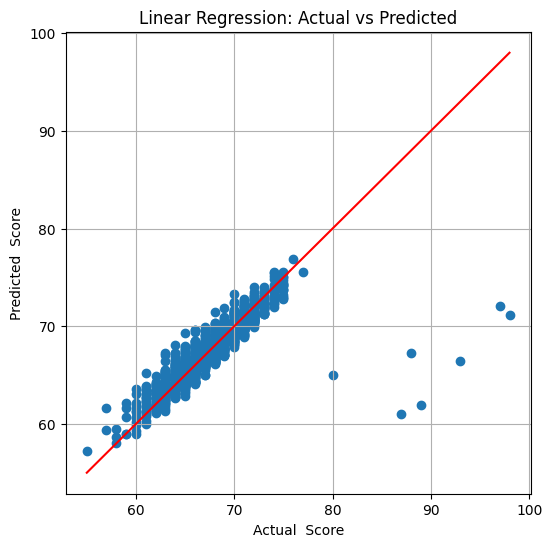

In [52]:
#استدعاء مكتبة الرسم
import matplotlib.pyplot as plt
import numpy as np

#انشاء حجم الرسمة
plt.figure(figsize=(6,6))
#رسم القيم الحقيقية مقابل القيم المتوقعة
#كل نقطة تمثل طالب واحد
plt.scatter(y_test, y_test_pred_linear)

# رسم الخط الأحمر
#هذا الخط يمثل الحالة عندما يكون التنبؤ مطابق للقيمة الحقيقية
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color='red')

#تسمية المحور السيني
plt.xlabel("Actual  Score")#الدرجة الحقيقية
#تسمية المحور الصادي
plt.ylabel("Predicted  Score")#الدرجة المتوقعة من النموذج
plt.title("Linear Regression: Actual vs Predicted") #عنوان الرسمة
plt.grid(True) #إظهار الشبكة لتسهيل قراءة القيم
plt.show()#عرض الرسم على شاشة المخرجات


الاستنتاج لرسم الانحدار الخطي: يظهر ان أغلب القيم المتوقعة قريبة من القيم الحقيقية وهذا يدل على ان نموذج الانحدار الخطي قادر على تفسير العلاقة بين المتغيرات والدرجة النهائية بشكل جيد مع وجود عدد بسيط من الاخطاء (هي النقاط التي تقع بعيدة عن الخط الأحمر)

الاستنتاج للنماذج الثلاثة: بعد مقارنة نتائج النماذج الثلاثة تبين ان نموذج الانحدار الخطي حقق أفضل أداء من حيث انخفاض متوسط الخطأ التربيعي وارتفاع معامل التحديد وأيضا نموذج الغابات العشوائية وسجلت شجرة القرار أضعف أداء بين النماذج جميعهم

===================================================
===================================================

### **Phase 2: Classification**


الهدف من هذه المرحلة هو تدريب نماذج تحت الاشراف لتنيف الطالب الى (راسب/ناجح/ممتاز) اعتمادا على نفس العوامل المؤثرة مثل عدد ساعات الدراسة والحضور والتحفيز وجودة المعلم وغيرها وبعد ذلك سيتم مقارنة النماذج باستخدام مقاييس الدقة لاختيار النموذج الأفضل للتصنيف

Preparing the data for the classification stage involves: converting student grades to (Fail/Pass/Excellent) and dividing the data into training, verification, and testing groups.


في هذه الخطوة ساقوم بتقسيم البيانات الى مجموعات بيانات تدريب واختبار وتحقق خاص بالتصنيف

In [53]:
from sklearn.model_selection import train_test_split
# المدخلات (كل الأعمدة ما عدا الدرجة والفئة)
X = df.drop(["Exam_Score", "stu_group"], axis=1)#تحديد أعمدة

# الهدف (الفئة)
y = df["stu_group"]

# تقسيم البيانات: 80% تدريب و20% اختبار
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)

Decision Tree Classifier

تم استخدام نموذج شجرة القرار لتصنيف الطلاب الى (راسب/ناجح/ممتاز) وتم تقييم النموذج باستخدام (Accuracy)

In [54]:
# استدعاء مكتبة نموذج شجرة القرار للتصنيف
from sklearn.tree import DecisionTreeClassifier
#استدعاء مقياس تقييم الدقة
from sklearn.metrics import accuracy_score

# إنشاء نموذج شجرة القرار
#ووضعت رقم 42 لتثبيت النتائج وعدم تغييرها في كل مرة
dt_classifier = DecisionTreeClassifier(random_state=42)

# تدريب النموذج على بيانات التدريب
# يتعلم النموذج العلاقة بين المدخلات (X_train)
## الفئة المستهدفة (y_train)
dt_classifier.fit(X_train, y_train)

# التنبؤ على بيانات الاختبار (20%)
y_test_pred_dt = dt_classifier.predict(X_test)

# حساب الدقة Accuracy
accuracy_dt = accuracy_score(y_test, y_test_pred_dt)

# طباعة النتائج النهائية للنموذج
print("Decision Tree Classifier Results:")
print("Accuracy:", accuracy_dt)

Decision Tree Classifier Results:
Accuracy: 0.9851097178683386


SVM

In [55]:
# استدعاء نموذج SVM للتصنيف
from sklearn.svm import SVC
#استدعاء مقياس تقييم الدقة
from sklearn.metrics import accuracy_score

# إنشاء نموذج SVM
# kernel='linear' يعني استخدام حد فاصل خطي بين الفئات
#ووضعت رقم 42 لتثبيت النتائج وعدم تغييرها في كل مرة
svm_model = SVC(kernel='linear', random_state=42)

# تدريب النموذج على بيانات التدريب (70%)
#يتعلم النموذج أفضل حد فاصل بين الفئات (راسب/ناجح/ممتاز)
svm_model.fit(X_train, y_train)

# التنبؤ على بيانات الاختبار (20%)
y_test_pred_svm = svm_model.predict(X_test)

# حساب دقة النموذج
accuracy_svm = accuracy_score(y_test, y_test_pred_svm)

# طباعة النتائج النهائية للنموذج
print("SVM Classification Results:")
print("Accuracy:", accuracy_svm)

SVM Classification Results:
Accuracy: 0.9945141065830722


Naive Bais

In [56]:
# استدعاء نموذج Naive Bayes (Gaussian) للتصنيف
from sklearn.naive_bayes import GaussianNB
#استدعاء مقياس تقييم الدقة
from sklearn.metrics import accuracy_score

# إنشاء نموذج Naive Bayes
#Gaussian منسبة عندما تكون البيانات رقمية
nb_model = GaussianNB()

# تدريب النموذج على بيانات التدريب (70%)
#هنا يتعلم النموذج العلاقة بين الخصائص والفئة (راسب/ناجح/ممتاز)
nb_model.fit(X_train, y_train)

# التنبؤ على بيانات الاختبار (20%)
y_test_pred_nb = nb_model.predict(X_test)

# حساب الدقة Accuracy
accuracy_nb = accuracy_score(y_test, y_test_pred_nb)

# طباعة النتائج النهائية للنموذج
print("Naive Bayes Classification Results:")
print("Accuracy:", accuracy_nb)

Naive Bayes Classification Results:
Accuracy: 0.9945141065830722


الاستنتاج: اظهرت النتائج ان نموذج ساذج بايز ونموذح وآلة دعم المتجهات حققو اعلى دقة تصنيف 99.45% تفوقو على شجرة القرار وهذا يشير الى قدرة أفضل على التمييز بين فئات الأداء الأكاديمي

In [57]:
import joblib
joblib.dump(linear_model, "student_model.pkl")

['student_model.pkl']

In [58]:
from google.colab import files
files.download("student_model.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [59]:
import joblib
joblib.dump(svm_model, "classification_model.pkl")

['classification_model.pkl']

In [60]:
from google.colab import files
files.download("classification_model.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>